In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('een_api_dataset.csv', sep=',')

In [59]:
df.shape

(1576, 12)

In [60]:
df.drop('Request ID', axis=1, inplace=True)
df.drop('Test case name', axis=1, inplace=True)
df.drop('Test suite name', axis=1, inplace=True)
#df.reset_index(drop=True, inplace=True)

In [48]:
df.columns

Index(['Endpoint', 'Method', 'Status Code', 'Start time',
       'Duration till headers received[ms]', 'Duration till body received[ms]',
       'Request Body Length', 'Response Body Length', 'Test Result'],
      dtype='object')

In [49]:
df.describe(include='all')

,Endpoint,Method,Status Code,Start time,Duration till headers received[ms],Duration till body received[ms],Request Body Length,Response Body Length,Test Result
count,1576,1576,1576.000000,1576,1576.000000,1576.000000,1576.000000,1576.000000,1576
unique,40,4,NaN,577,NaN,NaN,NaN,NaN,2
top,/g/aaa/authenticate,POST,NaN,2023-03-15 16:14:51,NaN,NaN,NaN,NaN,PASS
freq,258,847,NaN,14,NaN,NaN,NaN,NaN,1561
mean,NaN,NaN,240.028553,NaN,714.354695,807.784898,139.979061,625.442259,NaN
std,NaN,NaN,80.951389,NaN,2727.799703,3473.702488,239.154060,1162.558464,NaN
min,NaN,NaN,200.000000,NaN,0.000000,8.000000,0.000000,0.000000,NaN
25%,NaN,NaN,200.000000,NaN,58.000000,63.000000,0.000000,24.000000,NaN
50%,NaN,NaN,200.000000,NaN,120.000000,125.000000,49.000000,156.500000,NaN
75%,NaN,NaN,200.000000,NaN,595.250000,607.750000,88.000000,589.000000,NaN


In [51]:
# Max length
df.iloc[df['Duration till body received[ms]'].idxmax()]

Endpoint                              /g/metric/bridgebandwidth
Method                                                      GET
Status Code                                                 200
Start time                                   2023-03-15 0:04:44
Duration till headers received[ms]                        90262
Duration till body received[ms]                           90268
Request Body Length                                           0
Response Body Length                                      10659
Test Result                                                PASS
Name: 1407, dtype: object

# Represent the avg length of time to get a response by endpoint

#### Remove the FAILS from dataframe

In [61]:
df_no_fail = df[df['Test Result'] != 'FAIL'].copy()

In [33]:
grouped = df_no_fail.groupby('Endpoint')['Duration till body received[ms]'].mean()

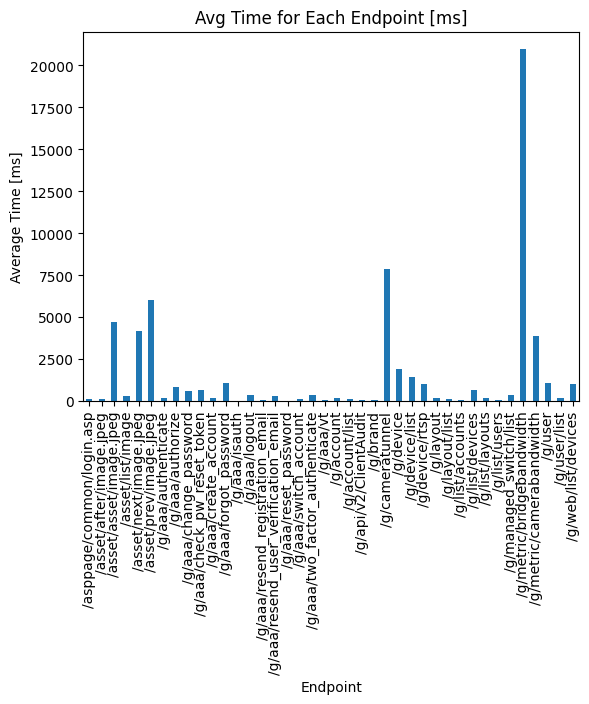

In [34]:
grouped.plot(kind='bar')
plt.xlabel('Endpoint')
plt.ylabel('Average Time [ms]')
plt.title('Avg Time for Each Endpoint [ms]')
plt.show()

In [61]:
# Does it correlate with size of body response?

In [35]:
grouped = df_no_fail.groupby('Endpoint')['Response Body Length'].mean()

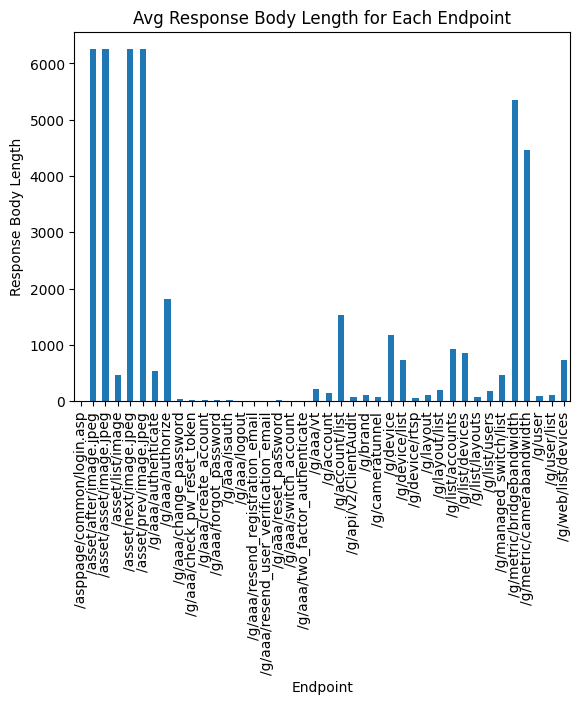

In [36]:
grouped.plot(kind='bar')
plt.xlabel('Endpoint')
plt.ylabel('Response Body Length')
plt.title('Avg Response Body Length for Each Endpoint')
plt.show()

In [14]:
# Does it correlate? i.e. how useful will APIv3 be on performance?

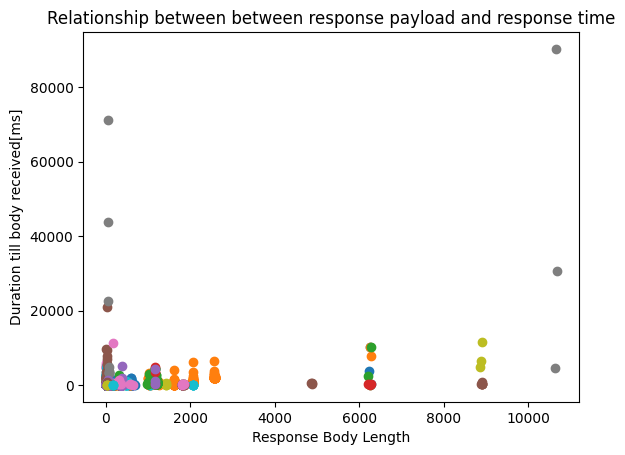

In [38]:
grouped = df_no_fail.groupby(['Endpoint', 'Response Body Length'])['Duration till body received[ms]'].mean()

# create a scatter plot to represent the relationship between response payload and response time
fig, ax = plt.subplots()
for endpoint in df_no_fail['Endpoint'].unique():
    endpoint_df = df_no_fail[df_no_fail['Endpoint'] == endpoint]
    ax.scatter(endpoint_df['Response Body Length'], endpoint_df['Duration till body received[ms]'], label=endpoint)
ax.set_xlabel('Response Body Length')
ax.set_ylabel('Duration till body received[ms]')
ax.set_title('Relationship between between response payload and response time')
#ax.legend()
plt.show()

In [40]:
length_time_df = df_no_fail[['Response Body Length', 'Duration till body received[ms]']]

corr = length_time_df.corr().iloc[0,1]

print('Correlation Coefficient: ', corr)

Correlation Coefficient:  0.2589372921909486


In [ ]:
# What endpoint is Max response time

# Median PASS response and FAIL response

In [43]:
avg_time_by_result = df.groupby('Test Result')['Duration till body received[ms]'].median()
print(avg_time_by_result)

Test Result
FAIL    113.0
PASS    125.0
Name: Duration till body received[ms], dtype: float64


## Avg Time of response every hour

In [64]:
# Convert 'Start time' column to datetime data type
df['Start time'] = pd.to_datetime(df['Start time'])

# Create a new column with the hour value
df['Hour'] = df['Start time'].dt.hour

# Calculate the mean duration for each hour
hourly_mean_duration = df.groupby('Hour')['Duration till body received[ms]'].median()

# Create a new dataframe with all hours included
all_hours = pd.DataFrame({'Hour': range(24)})

# Merge the hourly mean duration data with the all-hours dataframe
result = pd.merge(all_hours, hourly_mean_duration, on='Hour', how='left')

# Replace missing duration values with 0
result.fillna(0, inplace=True)

# Print the resulting dataframe
print(result)

    Hour  Duration till body received[ms]
0      0                            125.5
1      1                              0.0
2      2                              0.0
3      3                              0.0
4      4                              0.0
5      5                              0.0
6      6                              0.0
7      7                              0.0
8      8                              0.0
9      9                              0.0
10    10                              0.0
11    11                              0.0
12    12                              0.0
13    13                              0.0
14    14                              0.0
15    15                              0.0
16    16                            122.0
17    17                              0.0
18    18                              0.0
19    19                            129.0
20    20                            133.5
21    21                              0.0
22    22                          